# SVM from Scratch

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import precision_score,accuracy_score

In [4]:
class SVM:
    def __init__(self,lr,lambdap,iters) -> None:
        self.weight=None
        self.bias=None
        self.lr=lr
        self.lambdap=lambdap
        self.iters=iters

    def fit(self,X,Y):
        y=np.where(Y<=0,-1,1)
        sample,feature=X.shape

        self.weight=np.zeros(feature)
        self.bias=0

        for i in range(self.iters):
            for idx,xi in enumerate(X):
                if y[idx]*(np.dot(self.weight,xi)-self.bias) >=1 :
                    dw=2*self.lambdap*self.weight
                    db=0
                else:
                    dw = 2 * self.lambdap * self.weight - np.dot(xi, y[idx])
                    db = y[idx]
                self.weight -= self.lr * dw
                self.bias -= self.lr * db
        return self.weight, self.bias

    def pred(self, X):
        lpred = np.dot(X, self.weight) - self.bias 
        return np.sign(lpred)

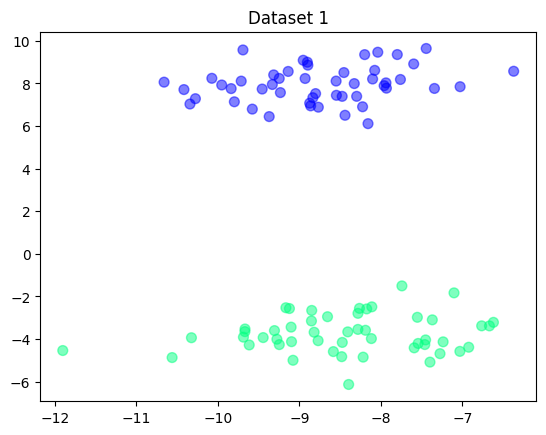

In [ ]:
X1, y1 = make_blobs(n_samples=100, centers=2)
y1 = np.where(y1 <= 0, -1, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', weight=.5)
plt.title("Dataset 1")
plt.show()

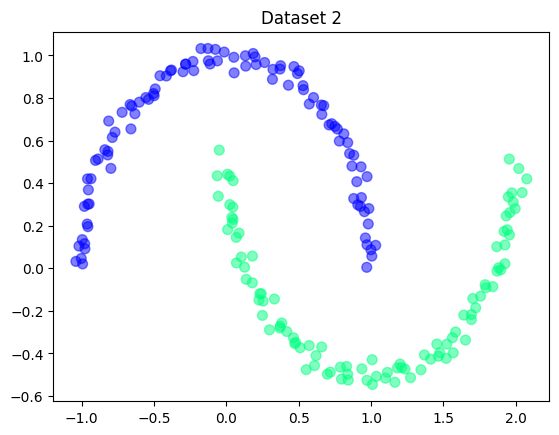

In [ ]:
X2, y2 = make_moons(n_samples=200,noise=.03)
y2=np.where(y2<=0,-1,1)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='winter', weight=.5)
plt.title("Dataset 2")
plt.show()

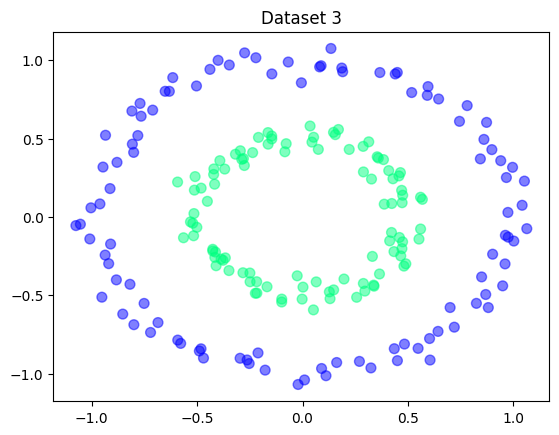

In [ ]:
X3, y3 = noisy_circles = make_circles(n_samples=200, factor=.5, noise=.05)
y3=np.where(y3<=0,-1,1)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='winter', weight=.5)
plt.title("Dataset 3")
plt.show()

In [50]:
def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

In [51]:
def plot_svm(X, y, w, b, title ='Plot for linear SVM'):    

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')  # Decision boundary
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')  # Negative margin
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')  # Positive margin
    
    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])
    
    plt.title(title)
    plt.show()

For dataset 1, accuracy score: 1.0


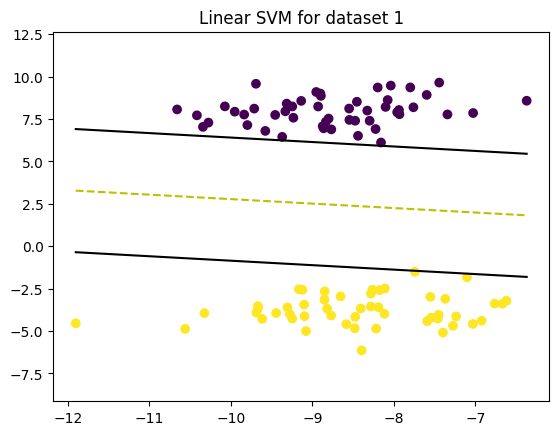

In [52]:
svm=SVM(0.001,0.01,1000)
w1,b1 = svm.fit(X1,y1)
y_pred = svm.pred(X1)
print("For dataset 1, accuracy score:", accuracy_score(y_pred,y1))
plot_svm(X1, y1, w1, b1, title='Linear SVM for dataset 1')

For dataset 2, accuracy score: 0.865


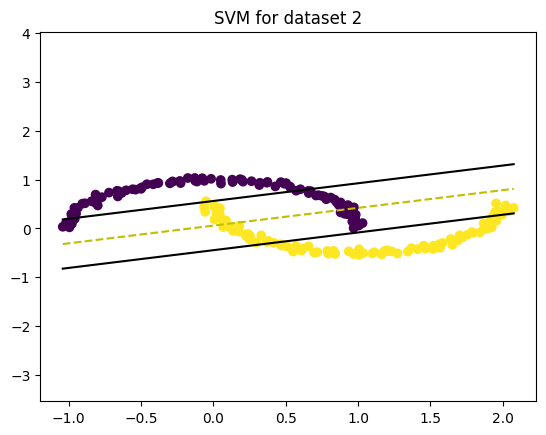

In [53]:
svm=SVM(0.001,0.01,1000)
w2,b2= svm.fit(X2,y2)
y_pred = svm.pred(X2)
print("For dataset 2, accuracy score:", accuracy_score(y_pred,y2))
plot_svm(X2, y2, w2, b2, title='SVM for dataset 2')

For dataset 3, accuracy score: 0.515


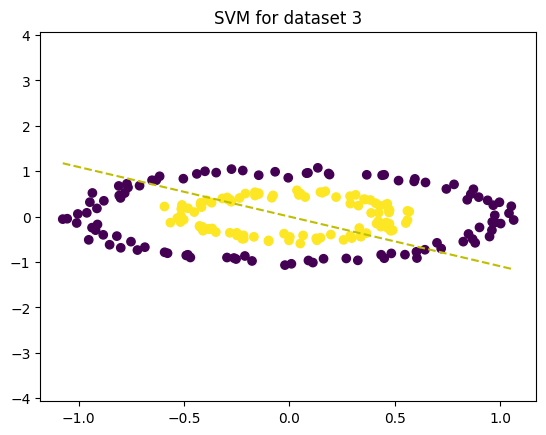

In [54]:
svm=SVM(0.001,0.01,1000)
w3,b3 = svm.fit(X3,y3)
y_pred = svm.pred(X3)
print("For dataset 3, accuracy score:", accuracy_score(y_pred,y3))
plot_svm(X3, y3, w3, b3, title='SVM for dataset 3')

# SVM using SGD

In [55]:
import random

In [56]:
class SVM_SGD:
    def __init__(self, lr, lambdap, iters) -> None:
        self.lr = lr
        self.lambdap = lambdap
        self.iters = iters
        self.weight = None
        self.bias = None

    def fit(self, X, Y):
        Y = np.where(Y <= 0, -1, 1)
        num_samples, num_features = X.shape
        self.weight = np.zeros(num_features)
        self.bias = 0
        
        for i in range(self.iters):
            
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            
            for idx in indices:
                xi = X[idx]
                yi = Y[idx]
                
                condition = yi * (np.dot(xi, self.weight) + self.bias) >= 1
                
                if condition:
                    dw = 2 * self.lambdap * self.weight
                    db = 0
                else:
                    dw = 2 * self.lambdap * self.weight - np.dot(xi, yi)
                    db = -yi 

                self.weight -= self.lr * dw
                self.bias -= self.lr * db
                
        return self.weight, self.bias

    def pred(self, X):
        predictions = np.dot(X, self.weight) + self.bias
        return np.sign(predictions)


In [57]:
svm1= SVM_SGD(lr=0.001,lambdap = 0.01,iters = 3000)
w1,b1=svm1.fit(X1,y1)
print("For dataset 1, score: ", accuracy_score(svm1.pred(X1),y1))

svm2= SVM_SGD(lr=0.001,lambdap = 0.01,iters = 3000)
w2,b2=svm2.fit(X2,y2)
print("For dataset 2, score: ", accuracy_score(svm2.pred(X2),y2))

svm3 = SVM_SGD(lr=0.001,lambdap = 0.01,iters = 3000)
w3,b3=svm3.fit(X3,y3)
print("For dataset 3, score: ", accuracy_score(svm3.pred(X3),y3))

For dataset 1, score:  1.0
For dataset 2, score:  0.865
For dataset 3, score:  0.515


# SVM For Non-Linear Data (Kernel Method)

In [63]:

class SVM_Kernel:
    def __init__(self, lr, lambdap, iters, kernel) -> None:
        self.lr = lr
        self.lambdap = lambdap
        self.iters = iters
        self.kernel = kernel

        if kernel == 'poly':
            self.kernel_func = self.poly_kernel
        elif kernel == 'rbf':
            self.kernel_func = self.rbf_kernel
        elif kernel == 'linear':
            self.kernel_func = self.linear_kernel
        else:
            raise ValueError("Unsupported kernel type")

    def fit(self, X, Y):
        sample, features = X.shape
        self.weight = np.zeros(sample)
        self.bias = 0

        self.X = X
        self.Y = Y

        for _ in range(self.iters):
            pos = random.randrange(0, sample)
            x = X[pos, :]
            y = Y[pos]

            K = self.kernel_func(x, X)
            
            # Decision function computation
            decision_func = y * np.sum(self.weight * self.Y * K) - self.bias

            if decision_func >= 1:
                dw = 0
                db = 0
            else:
                self.weight[pos]+=self.lr
                self.bias-=self.lr*y

        return self.weight, self.bias

    def pred(self, X_test):
        predictions = []
        for x_test in X_test:
            decision_func = np.sum(self.weight * self.Y * self.kernel_func(self.X, x_test)) - self.bias
            predictions.append(np.sign(decision_func))
        return np.array(predictions)

    def linear_kernel(self, x1, x2):
        return np.dot(x2, x1.T)  
    
    def poly_kernel(self, x1, x2, p=3):
        # Polynomial kernel function
        return (1 + np.dot(x2, x1.T)) ** p

    def rbf_kernel(self, x1, x2, gamma=0.1):
        # RBF kernel (Gaussian)
        return np.exp(-gamma * np.linalg.norm(x2 - x1, axis=1) ** 2)


In [69]:
svm1 = SVM_Kernel(lr=0.001, lambdap=0.01, iters=3000, kernel='linear')
w1, b1 = svm1.fit(X1, y1)
print("For dataset 1, score: ", accuracy_score(svm1.pred(X1), y1))

svm2 = SVM_Kernel(lr=0.001, lambdap=0.01, iters=3000, kernel='poly')
w2, b2 = svm2.fit(X2, y2)
print("For dataset 2, score: ", accuracy_score(svm2.pred(X2), y2))

svm3 = SVM_Kernel(lr=0.001, lambdap=0.01, iters=3000, kernel='rbf')
w3, b3 = svm2.fit(X3, y3)
print("For dataset 2, score: ", accuracy_score(svm2.pred(X3), y3))

For dataset 1, score:  1.0
For dataset 2, score:  0.905
For dataset 2, score:  1.0
